# Lane Lines Detector Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

# Import 

In [1]:
# Import everything
import os
import numpy as np
import cv2
import glob
import pickle
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

## Adding the Plotter Utility

In [2]:
import src.plotter_util as pltu

# Look at the images

camera_cal\calibration10.jpg
camera_cal\calibration11.jpg
camera_cal\calibration12.jpg
camera_cal\calibration13.jpg
camera_cal\calibration14.jpg
camera_cal\calibration15.jpg
camera_cal\calibration16.jpg
camera_cal\calibration17.jpg
camera_cal\calibration18.jpg
camera_cal\calibration19.jpg
camera_cal\calibration2.jpg
camera_cal\calibration20.jpg
camera_cal\calibration3.jpg
camera_cal\calibration6.jpg
camera_cal\calibration7.jpg
camera_cal\calibration8.jpg
camera_cal\calibration9.jpg


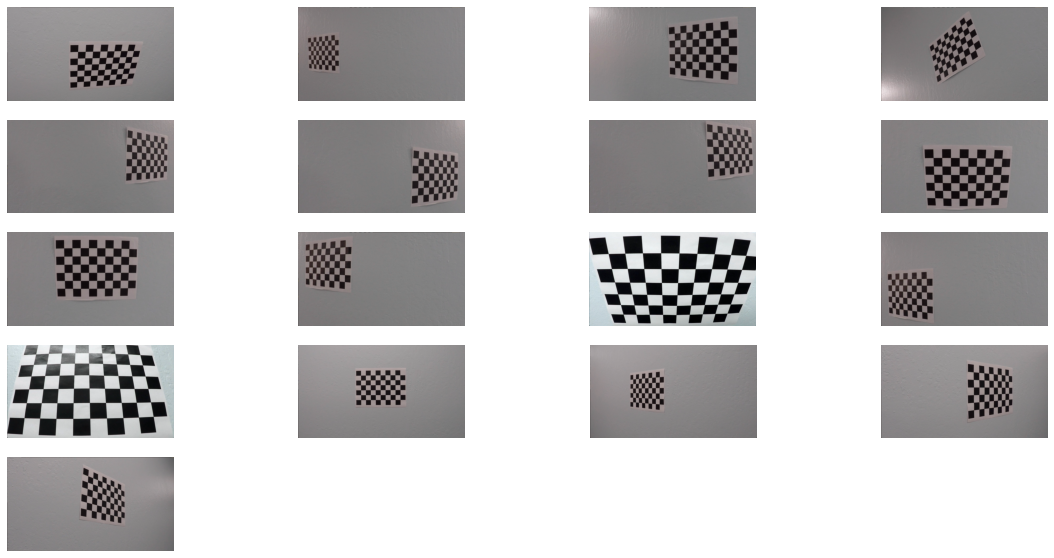

In [3]:
import matplotlib.gridspec as gridspec

images = glob.glob('camera_cal/calibration*.jpg')

plt.figure(figsize=(20, 10))

for idx, fname in enumerate(images):
    print(fname)
    img = cv2.imread(fname)

    plt.subplot(len(images)//3, 4, idx+1)
    plt.imshow(img)
    plt.axis("off")

# Calibrate the Camera

### Import the Camera calibrator

In [4]:
import src.camera_calibrator as ccb

### Finding the chessboard corners

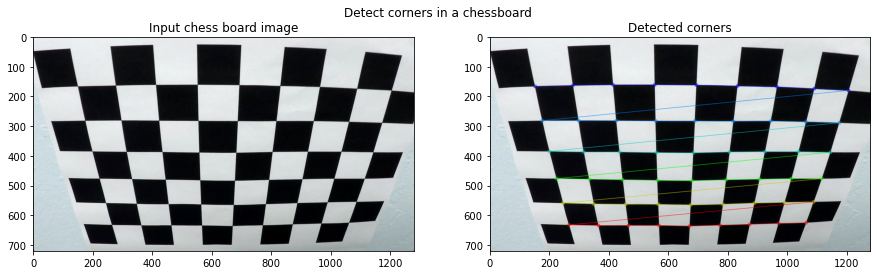

In [5]:
nx=9
ny=6

img = cv2.imread('./camera_cal/calibration2.jpg')
copied_img = img.copy() # to be useful in plotting as the image will be changed by the below function
img_corners = ccb.find_and_draw_chessboard_corner_for_image(img, nx=nx, ny=ny)
pltu.plot_compare_two_images(copied_img, img_corners, 
                             suptitle='Detect corners in a chessboard', 
                             subtitle1='Input chess board image', subtitle2='Detected corners',
                            is_save=True, save_path="./output_images/chessboard_corners1.png")


### Finding Corners for All Images - Get image and object points

In [6]:
img_file_pattern='./camera_cal/calibration*.jpg'
objpoints, imgpoints, img_size = ccb.find_chessboard_corners(img_file_pattern, nx=nx, ny=ny)

### Camera matrix and distortion coefficients
To calibrate a camera, we use multiple chessboard images, and compute camera matrix and distortion coefficients.

In [7]:
mtx, dist = ccb.calibrate_camera(img_file_pattern,nx=nx,  ny=ny)

# Undistort the Image

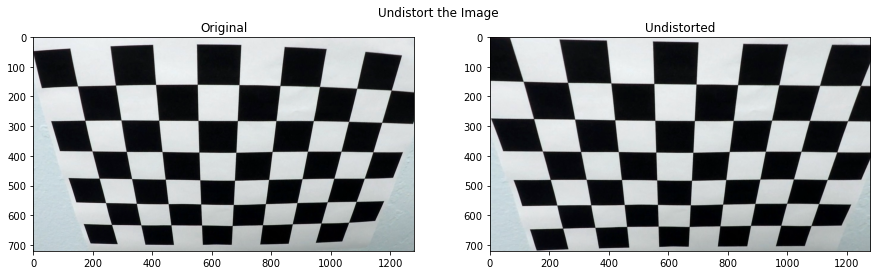

In [8]:
img = cv2.imread('./camera_cal/calibration2.jpg')
undist_image = cv2.undistort(img, mtx, dist, None, mtx) # OR we can use ccb.undistort_image(image, mtx, dist)

pltu.plot_compare_two_images(img, undist_image, 
                             suptitle='Undistort the Image', 
                             subtitle1='Original', subtitle2='Undistorted',
                            is_save=True, save_path="./output_images/chessboard_undistort.png")

# Working with the Test Images i.e. Lane Image data now

## Undistort the Test Images

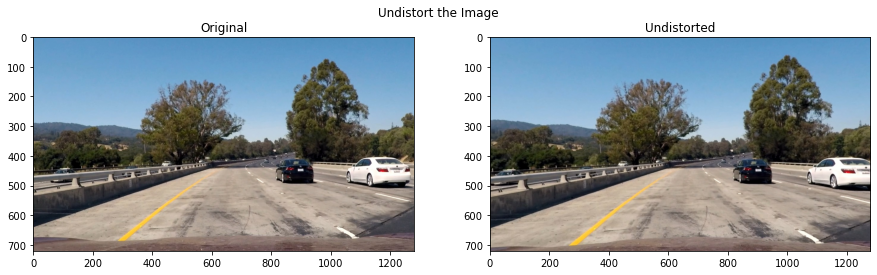

In [9]:
img = mpimg.imread('./test_images/test1.jpg')
undist_image = cv2.undistort(img, mtx, dist, None, mtx)
pltu.plot_compare_two_images(img, undist_image, 
                             suptitle='Undistort the Image', 
                             subtitle1='Original', subtitle2='Undistorted',
                            is_save=True, save_path="./output_images/chessboard_undistort.png")


# Warp the Image - Perspective Transform

### Import the perspective_transformer

In [10]:
import src.perspective_transformer as ppt

### Checked Warped Image

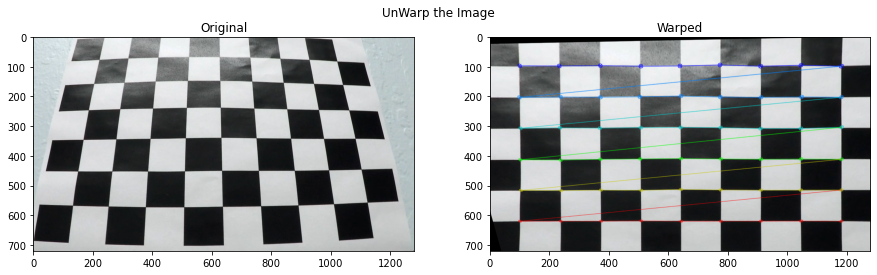

In [11]:
# Check warped image
img = cv2.imread('./camera_cal/calibration3.jpg')
warped, M, Minv = ppt.corners_unwarp(img, mtx, dist, nx=9, ny=6)
pltu.plot_compare_two_images(img, warped, 
                             suptitle='UnWarp the Image', 
                             subtitle1='Original', subtitle2='Warped',
                            is_save=True, save_path="./output_images/chessboard_unwarped.png")

# Thresholding - Color and Gradient

## Sobel Filter

### Import Sobel Filter

In [12]:
import src.sobel_thresholder as sbt

### Applying the Sobel Filter

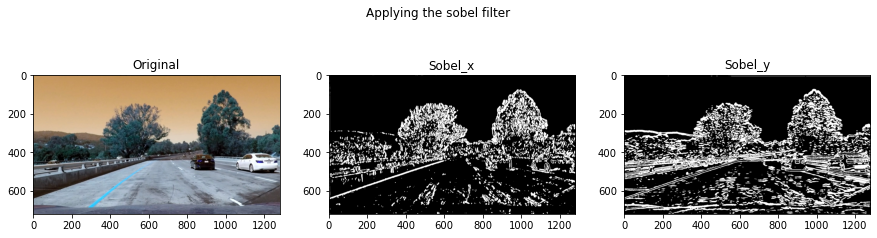

In [13]:
# Sample image
image = cv2.imread('./test_images/test1.jpg')
sobel_x_binary = sbt.abs_sobel_threshold(image, orient='x', sobel_kernel=25, thres=(15, 100), is_gray=True)
sobel_y_binary = sbt.abs_sobel_threshold(image, orient='y', sobel_kernel=25, thres=(15, 100), is_gray=True)

pltu.plot_compare_three_images(image, sobel_x_binary, sobel_y_binary,
                             suptitle='Applying the sobel filter', 
                             subtitle1='Original', subtitle2='Sobel_x', subtitle3='Sobel_y',
                            is_save=True, save_path="./output_images/abs_sobel.png", gray_vector=[False, True, True])

## Color Spaces

### Importing the Color Thresholder

In [14]:
import src.color_thresholder as cth

### HLS Color Space

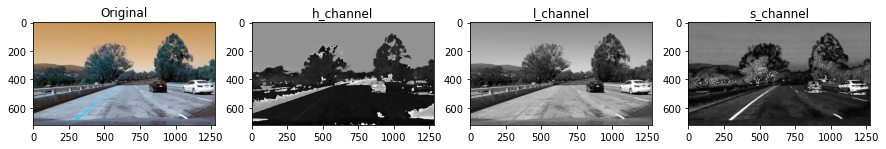

In [15]:
img = cv2.imread('./test_images/test1.jpg')
channel='HLS'
h_channel, l_channel, s_channel  = cth.split_channels(img, channel)

# Plotting now
images = [img, h_channel, l_channel, s_channel]
subtitles = ['Original', 'h_channel', 'l_channel', 's_channel']
pltu.plot_compare_n_images_grayed( images, suptitle=channel, 
                             subtitles=subtitles,grayed_array=[False, True, True, True],
                            is_save=True, save_path='./output_images/'+channel+'_demo.png')


## Final Thresholder

### Importing the final thresholder

In [16]:
import src.final_thresholder as fth

### Example of Color Thresholder

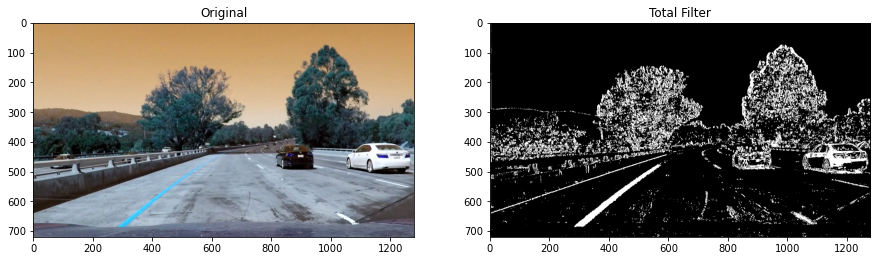

In [17]:
# Show example
img = cv2.imread('./test_images/test1.jpg')
color_binary, combined_binary = fth.grad_color_threshold(img)


images = [img, combined_binary]
subtitles = ['Original',  'Total Filter']
grayed = [False, True]

pltu.plot_compare_n_images_grayed( images, suptitle=channel, 
                             subtitles=subtitles,grayed_array=grayed,
                            is_save=True, save_path='./output_images/combined_filters_demo.png')

## Back to Perspective Transfomation - Finding Corners

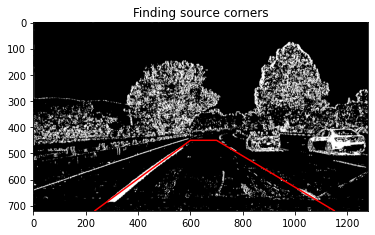

In [18]:
# Show example
img = cv2.imread('./test_images/test1.jpg')
_, combined_binary = fth.grad_color_threshold(img)
plt.imshow(combined_binary, cmap='gray')
plotted = plt.plot([235, 600, 700, 1150], [719, 450, 450, 719], 'r-')
plt.title('Finding source corners')
plt.savefig('./output_images/src_corners.png', bbox_inches='tight')

### Running the Perspective Transform on the Test Image

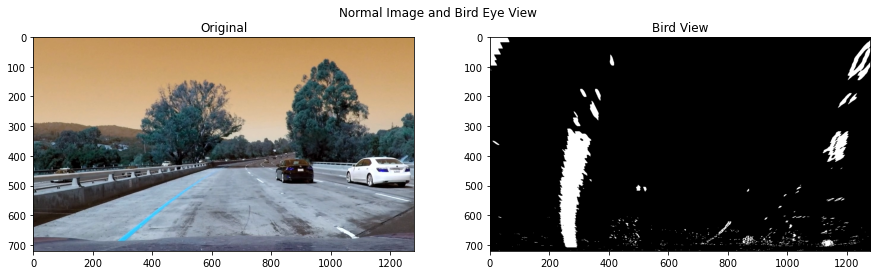

In [19]:
binary_warped, Minv, M = ppt.transform_img(combined_binary, is_gray=True)

img = cv2.imread('./test_images/test1.jpg')
pltu.plot_compare_two_images(img, binary_warped, 
                             suptitle='Normal Image and Bird Eye View', 
                             subtitle1='Original', subtitle2='Bird View',
                             is_save=True, save_path="./output_images/warped.png", gray_vector=[False, True])

## Draw Histogram to identify lanes and Fit Polynomial to Sliding Windows

### Importing the Lane Detector

In [20]:
import src.lane_detector as ldt

### Testing the Lane Detector

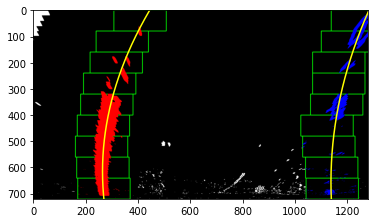

In [21]:
left_fitx, right_fitx, ploty, left_fit, right_fit = ldt.find_lane_lines(binary_warped, visualize=True)
plt.savefig('./output_images/sliding_windows1.png', bbox_inches='tight')

## Measuring curvature

In [22]:
# show sample curvature
ldt.get_curvature_radius(left_fitx, right_fitx, ploty)

(381.6749815844637, 316.74077011687007, 446.6091930520573)

## Measuring off center

In [23]:
print(ldt.dist_from_center2(img, left_fit, right_fit))
print(ldt.dist_from_center(left_fitx, right_fitx))

0.3728498459020608
-0.37244198635723774


## Visualize detected lane

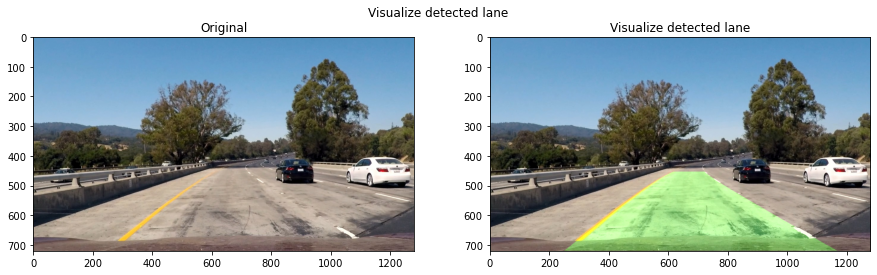

In [24]:
# show example
img = mpimg.imread('./test_images/test1.jpg')
colored_binary, combined_binary = fth.grad_color_threshold(img)

binary_warped, Minv, M = ppt.transform_img(combined_binary, is_gray=True)
result = ldt.show_inside_lane(img, binary_warped, Minv, left_fitx, right_fitx, ploty)

pltu.plot_compare_two_images(img, result, 
                             suptitle='Visualize detected lane', 
                             subtitle1='Original', subtitle2='Visualize detected lane',
                             is_save=True, save_path="./output_images/Visualize_detected_lane.png")

# Final Pipeline

### Import the pipline for 1 Image

In [25]:
import src.final_pipeline as fnp

## Test Pipeline

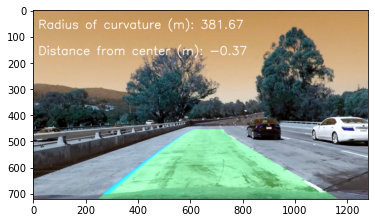

In [26]:
img = cv2.imread('./test_images/test1.jpg')

result = fnp.pipeline_for_image(img, mtx, dist)

plt.imshow(result)
plt.savefig('./output_images/pipeline_result.png', bbox_inches='tight')

# test on video

In [27]:
%time fnp.pipeline_for_video(mtx, dist, input_video='test_videos/project_video.mp4',output_video='output_test_videos/out_project_video.mp4')

Moviepy - Building video output_test_videos/out_project_video.mp4.
Moviepy - Writing video output_test_videos/out_project_video.mp4



Moviepy - Done !
Moviepy - video ready output_test_videos/out_project_video.mp4
Wall time: 3min 53s


In [28]:
%time fnp.pipeline_for_video(mtx, dist, input_video='test_videos/challenge_video.mp4',output_video='output_test_videos/out_challenge_video.mp4')

Moviepy - Building video output_test_videos/out_challenge_video.mp4.
Moviepy - Writing video output_test_videos/out_challenge_video.mp4



Moviepy - Done !
Moviepy - video ready output_test_videos/out_challenge_video.mp4
Wall time: 1min 25s


In [29]:
%time fnp.pipeline_for_video(mtx, dist, input_video='test_videos/harder_challenge_video.mp4',output_video='output_test_videos/out_harder_challenge_video.mp4')

Moviepy - Building video output_test_videos/out_harder_challenge_video.mp4.
Moviepy - Writing video output_test_videos/out_harder_challenge_video.mp4



Moviepy - Done !
Moviepy - video ready output_test_videos/out_harder_challenge_video.mp4
Wall time: 4min 14s
